This notebook is used to prepare the imputed VCF files  

First we filter the vcf (for snps with R^2 > 0.7), then merge

In [1]:
library(parallel)

In [2]:
setwd("/path/to/imputed_genotypes")

In [9]:
setwd("stanford")

In [4]:
filter_vcf = function(vcf) {
     
    outvcf = gsub(".vcf", ".snps.R07.vcf.gz",vcf)
    system(paste('bcftools view', vcf , "-i \'INFO/R2[0]>0.7\'  --types snps -Oz -o" , outvcf))
    system(paste("tabix", outvcf))

    }

In [87]:
#mclapply(list.files(), function(x) filter_vcf(x) , mc.cores = 32)

In [6]:
setwd("../oxford")

In [78]:
filter_vcf = function(vcf) {
     
    outvcf = gsub(".vcf.gz", ".snps.R07.vcf.gz",vcf)
    system(paste('bcftools view', vcf , "-i \'INFO/R2[0]>0.7\'  --types snps -Oz -o" , outvcf))
    system(paste("tabix", outvcf))

    }

In [88]:
#mclapply(list.files(), function(x) filter_vcf(x) , mc.cores = 32)

In [31]:
setwd('..')

Note on merging: the INFO column is from the first VCF to be merged (does not apply to both).
- do not assume reference becauese the starting genotypes were the same - but then were filtered for R2 so removed

In [82]:
merge_vcf = function(chr) {
    vcf1 =  paste0("oxford/chr",chr, ".dose.snps.R07.vcf.gz")
    vcf2 =  paste0("stanford/chr",chr, ".dose.snps.R07.vcf.gz")
    merged.vcf = paste0("merged/chr",chr, ".merged.vcf.gz" )
    system(paste('bcftools merge -m none',  vcf1, vcf2,  '-Oz >', merged.vcf))
    system(paste("tabix", merged.vcf))
}

In [89]:
#mclapply(1:22, function(x) merge_vcf(x) , mc.cores = 32)

### Filter for sample subset and for non missing genotypes

In [14]:
# Make sample list
multiome_samples <- data.frame(vcf_name=c("R207_R207",
"R217_R217",
"R218_R218",
"R221_R221",
"R223_R223",
"R226_R226",
"R228_R228",
"R234_R234",
"R237_R237",
"R238_R238",
"R246_R246",
"R247_R247",
"R275_R275",
"R284_R284",
"R290_R290",
"R292_R292",
"R316_R316",
"R317_R317",
"R319_R319",
"R325_R325",
"R326_R326",
"R327_R327",
"3_Plate1_A3_EDMN_R332",
"6_Plate1_C10_EDMN_R353",
"7_Plate1_C11_EDMN_R354",
"5_Plate2_A5_EDMN_R362",
"6_Plate2_A6_EDMN_R363",
"7_Plate2_A7_EDMN_R364"), sample=c("R207",
"R217",
"R218",
"R221",
"R223",
"R226",
"R228",
"R234",
"R237",
"R238",
"R246",
"R247",
"R275",
"R284",
"R290",
"R292",
"R316",
"R317",
"R319",
"R325",
"R326",
"R327",
"R332",
"R353",
"R354",
"R362",
"R363",
"R364"))

multiome_samples

write.table(multiome_samples,'/path/to/samples/multiome_all_kept_samples.txt', quote=F,
            row.names=F, col.names=T, sep="\t")

vcf_name,sample
<chr>,<chr>
R207_R207,R207
R217_R217,R217
R218_R218,R218
R221_R221,R221
R223_R223,R223
R226_R226,R226
R228_R228,R228
R234_R234,R234
R237_R237,R237


In [11]:
#samps = read.table('../multiome_european_samples', header=T)
samps = read.table('/path/to/samples/multiome_all_kept_samples.txt', header=T)
samps

vcf_name,sample
<chr>,<chr>
R207_R207,R207
R217_R217,R217
R218_R218,R218
R221_R221,R221
R223_R223,R223
R226_R226,R226
R228_R228,R228
R234_R234,R234
R237_R237,R237


In [13]:
#write.table(samps, '../multiome_european_samples_rename_file', quote=F,
write.table(samps, '/path/to/samples/multiome_all_kept_samples_rename_file', quote=F,
            row.names=F, col.names=F, sep=" ")

In [ ]:
getwd()

In [20]:
# Subset function
subset_vcf = function(chr) {
    vcf     =  paste0("merged/chr" ,  chr, ".merged.vcf.gz")
    outvcf  =  paste0("/path/to/imputed_genotypes/","multiome_28/chr",chr, ".multi.ancestry.vcf.gz")

system(paste('bcftools view', vcf , "-s", paste(samps$vcf_name, collapse=","),
        " | bcftools view -e \'GT[*] = \"./.\"\' | bcftools reheader -s '/path/to/samples/multiome_all_kept_samples_rename_file' >" , 
             outvcf),
      intern=TRUE)
    
     system(paste("bgzip", outvcf))   
    
    system(paste0("tabix ", outvcf, ".gz"))
    }

In [21]:
# Apply across chromosomes
mclapply(1:22, subset_vcf, mc.cores = 32)

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 0

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 0

[[11]]
[1] 0

[[12]]
[1] 0

[[13]]
[1] 0

[[14]]
[1] 0

[[15]]
[1] 0

[[16]]
[1] 0

[[17]]
[1] 0

[[18]]
[1] 0

[[19]]
[1] 0

[[20]]
[1] 0

[[21]]
[1] 0

[[22]]
[1] 0

### PCAs

This is for understanding population structure  

We can use the 1000 Genome project as a background to understand population structure and visualize ancestry

#Plink commands to run PCA

#Prune  
plink1.9 -bfile IM_1KG_merge_intersect --indep 50 5 2 --maf .01 --make-bed --out IM_1KG_merge_intersect.pruned

#Run PCA  
plink1.9 --bfile IM_1KG_merge_intersect.pruned \
  --extract IM_1KG_merge_intersect.pruned.prune.in \
  --out IM_1KG_merge_intersect.pruned.pca \
  --pca tabs header

In [1]:
pcas_new = read.table('/path/to/genotypes/pca/IM_1KG_merge_intersect.pruned.pca.eigenvec', header=T)

dim(pcas_new)
head(pcas_new)
tail(pcas_new)

[1] 2576   22

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HG00096,HG00096,-0.0135922,-0.0267914,0.000801795,-0.0198937,-0.01017720,2.10448e-04,0.00240444,0.00388107,⋯,0.02109400,0.0247047,0.000410522,0.0210820,-0.0180779,0.0117862,0.00550543,0.00816908,0.00332644,-0.00276409
2,HG00097,HG00097,-0.0137645,-0.0271117,0.000872880,-0.0185733,-0.01020560,-3.32929e-05,0.00152348,0.00167807,⋯,0.00772625,0.0208785,0.002500470,0.0234705,-0.0204274,0.0195835,0.00866417,0.00624473,0.00981212,-0.00499454
3,HG00099,HG00099,-0.0137001,-0.0271025,0.000633083,-0.0181092,-0.01451260,8.92136e-04,0.00224261,0.00495369,⋯,0.02218330,0.0277902,0.002183310,0.0194478,-0.0180207,0.0210601,0.01180740,0.00353841,0.01017900,-0.00213823
4,HG00100,HG00100,-0.0135056,-0.0275181,0.001060030,-0.0190422,-0.00772807,1.00895e-03,0.00194837,0.00658945,⋯,0.02102080,0.0253985,0.004106400,0.0270003,-0.0240996,0.0188375,0.01555250,0.00409066,0.00492822,-0.00324751
5,HG00101,HG00101,-0.0135573,-0.0266562,0.000682601,-0.0193958,-0.01186120,4.90204e-04,0.00113370,0.00406968,⋯,0.01584460,0.0270843,0.001114020,0.0244454,-0.0213987,0.0214381,0.00463993,0.01030520,0.00442469,-0.00352965
6,HG00102,HG00102,-0.0137559,-0.0267083,0.000856755,-0.0187830,-0.01553620,8.24503e-04,0.00239030,0.00451975,⋯,0.02249650,0.0320976,0.000542671,0.0249760,-0.0207510,0.0186931,0.00918992,0.00489459,0.00692182,0.00105077


,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2571,R332,R332,-0.0136106,-0.0278890,1.04225e-03,-0.01822090,-0.00523781,-0.00202937,0.002349180,0.00111562,⋯,0.010486600,0.0312023,-0.00426005,0.015784000,-0.02061420,0.01123670,0.005995560,3.46402e-03,0.011440900,-0.01007090
2572,R353,R353,-0.0132022,-0.0273276,1.13320e-03,-0.01950410,0.00497368,-0.00342464,0.002555440,0.00337867,⋯,0.002390070,0.0139961,-0.00540574,-0.006825820,0.00144542,-0.00832076,0.001355130,1.53784e-05,0.006970960,-0.00424482
2573,R354,R354,-0.0130048,-0.0265375,5.25248e-05,-0.01845040,0.00787847,-0.00280444,0.003376580,0.00138336,⋯,0.000963516,0.0232148,-0.00250141,0.005367480,-0.00486204,0.00747624,0.000644818,3.22837e-03,0.001815050,-0.00321026
2574,R362,R362,-0.0134155,-0.0258685,2.06244e-03,-0.01580840,-0.00546905,-0.00183816,0.000839656,-0.00349612,⋯,0.002502390,0.0204435,-0.00264782,-0.011116400,-0.00238523,-0.00119932,0.001293460,1.00298e-03,-0.000130103,0.00206249
2575,R363,R363,-0.0133594,-0.0160743,-1.99580e-02,-0.00299629,0.00301936,-0.00240966,0.002998150,-0.00102667,⋯,0.004591690,0.0173479,-0.00453003,0.000228193,0.00134256,0.00687677,-0.002310780,7.29481e-04,0.007526000,0.00300729
2576,R364,R364,-0.0134294,-0.0258266,1.15606e-03,-0.01733340,-0.00692833,-0.00156091,0.002243070,0.00341733,⋯,0.006795450,0.0181856,-0.00630641,-0.001835500,0.00269152,0.00256867,-0.001557290,2.62537e-03,0.001048810,-0.00216814


[1] 2576   22

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HG00096,HG00096,-0.0116728,-0.0258590,0.00903614,-0.0196319,0.00543553,0.00472319,0.00104518,-0.003962970,⋯,0.00945522,0.00731204,-0.0214474,-0.00797730,0.0215319,0.00861298,-0.00341879,-0.004819760,-0.01258280,0.00201575
2,HG00097,HG00097,-0.0117830,-0.0269322,0.00916972,-0.0185780,0.00566025,0.00285754,0.00105691,-0.000847045,⋯,-0.02556570,0.01127520,-0.0352004,-0.00387592,0.0308433,0.02386750,-0.00592579,-0.013739100,-0.03120270,0.00787650
3,HG00099,HG00099,-0.0118891,-0.0268869,0.00927261,-0.0175336,0.00859404,0.00954158,0.00553968,-0.003854480,⋯,-0.08440270,0.00175031,-0.0329802,-0.01189520,0.0321656,0.01801910,-0.00821940,-0.000245963,-0.01379480,0.00224047
4,HG00100,HG00100,-0.0115327,-0.0268822,0.00873961,-0.0180744,0.00173942,0.00361058,0.00186542,-0.005310470,⋯,0.02233010,0.00400364,-0.0208793,-0.01732870,0.0107947,0.00611567,0.00850795,-0.009257740,-0.00496657,-0.01331000
5,HG00101,HG00101,-0.0115694,-0.0260389,0.00964793,-0.0188751,0.00378215,0.00520270,0.00186264,-0.001944760,⋯,0.01056530,0.00859932,-0.0233053,-0.00506921,0.0233082,0.00758418,-0.00115989,-0.013043400,-0.00840668,-0.00950946
6,HG00102,HG00102,-0.0119355,-0.0261903,0.00811647,-0.0173505,0.00768530,0.00985689,0.00490250,-0.000365211,⋯,0.02001320,0.01291320,-0.0239543,-0.01089920,0.0171245,0.01083210,0.00268289,0.007160230,-0.00944344,-0.00856678


,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2571,R332,R332,-0.0118800,-0.0285405,0.00986381,-0.01938330,0.00384131,0.00269033,0.00285085,9.43001e-05,⋯,0.07530190,0.063417500,-0.07068930,-0.00774776,0.08881360,0.04394520,0.002963850,0.110037000,0.007754540,0.012080600
2572,R353,R353,-0.0116031,-0.0270483,0.00976687,-0.02006410,-0.00392465,-0.00764978,0.00390195,-7.09482e-03,⋯,0.04134780,0.017474900,0.02595460,0.00598492,-0.01249070,-0.00335466,-0.041981100,0.060890400,0.030745100,0.181467000
2573,R354,R354,-0.0114172,-0.0270385,0.01029270,-0.01922490,-0.00814140,-0.01075150,0.00463970,-5.64552e-04,⋯,0.00586664,-0.008201940,-0.06222150,-0.03983100,0.04780970,0.05207480,-0.035970000,-0.066943600,-0.163736000,0.000548555
2574,R362,R362,-0.0116987,-0.0262846,0.00667680,-0.01762350,0.00396624,0.00716293,0.00104743,3.92751e-03,⋯,0.02324420,-0.000271103,0.00972908,0.01438870,0.00589670,-0.00126227,-0.014330600,-0.050624200,-0.053387200,-0.012092200
2575,R363,R363,-0.0120296,-0.0175499,0.02043220,0.00570982,-0.00606513,-0.00648293,0.00560114,4.07209e-04,⋯,0.01620640,0.001872860,-0.01809700,0.00231946,-0.00573858,0.00502908,-0.000637645,-0.001981990,0.002460420,-0.001982540
2576,R364,R364,-0.0119274,-0.0262566,0.00802926,-0.01796310,0.00628964,0.00881724,0.00336677,-2.75427e-03,⋯,0.03078960,-0.007704000,-0.04875900,-0.02471920,-0.02034690,0.00247017,-0.015884200,0.000120394,0.000725765,0.004256600


In [2]:
# Read in metadata labels
sup = read.table("/data/1KGP/1kg_super_population_table.tsv", sep="\t", header=T)
samp = read.table("/data/1KGP/1kg_population_sample_table.tsv", sep="\t", header=T)
samp = merge(samp, sup, by.x=2, by.y=1)

In [8]:
homedir  = '/path/to/genotypes/chr1test/'
gtnames= readLines(paste0(homedir, "sample_list"))

In [9]:
length(gtnames)

[1] 105

In [4]:
setwd("/path/to/genotypes/imputed_genotypes")

In [5]:
dat = read.table('../../data/barcode_celltypes_selection.txt', header=T)

In [6]:
length(unique(dat$sample))

[1] 31

In [10]:
# Build up labels table
samples = unique(dat$sample)
tab = sapply(samples, function(x) grepl(x, gtnames))
rownames(tab) = gtnames
tab = tab[rowSums(tab)>0,]             
df =data.frame(apply(tab, 1, function(x) colnames(tab)[x]))

In [11]:
#df2 = data.frame(Sample= rownames(df)[df[,1] %in% samples], SuperPopulation.Code="Sc_Islets")
df2 = data.frame(Sample= df[,1][df[,1] %in% samples], SuperPopulation.Code="Sc_Islets")
samp2 = rbind(samp[,2:3], df2)

In [12]:
samp2

Sample,SuperPopulation.Code
<chr>,<chr>
HG02308,AFR
HG02255,AFR
HG02111,AFR
HG02480,AFR
HG01894,AFR
HG02478,AFR
HG02427,AFR
HG02479,AFR
HG02451,AFR


In [13]:
library(RColorBrewer)

col=brewer.pal(6,"Paired")

In [14]:
var_new = readLines('/path/to/genotypes/pca/IM_1KG_merge_intersect.pruned.pca.eigenval')

var_new_expl =paste0( "PC", 1:20, " (",round((as.numeric(var_new)/sum(as.numeric(var_new)))*100,1), "%)")

samp2$SuperPopulation.Code = as.factor(samp2$SuperPopulation.Code)

In [16]:
#codes = stringr::str_split_fixed( samp2[samp2$SuperPopulation.Code=="Sc_Islets",'Sample'], "_R",2)[,2]
codes = samp2[samp2$SuperPopulation.Code=="Sc_Islets",'Sample']

In [17]:
pcas_new$labs =codes[ match( pcas_new$FID  , samp2[samp2$SuperPopulation.Code=="Sc_Islets",'Sample']  )  ]
pcas_full$labs =codes[ match( pcas_full$FID  , samp2[samp2$SuperPopulation.Code=="Sc_Islets",'Sample']  )  ]

In [25]:
dim(pcas_new)
dim(samp2)
dim(dplyr::left_join(pcas_new, samp2, dplyr::join_by(FID==Sample)))

[1] 2576   23

[1] 3531    2

[1] 2576   24

In [28]:
write.table(dplyr::left_join(pcas_new, samp2, dplyr::join_by(FID==Sample)),
            '/path/to/genotypes/pca/Supplemental_gPCA_data.tsv',
           sep='\t', row.names=T, col.names=T, quote=F)

In [27]:
tail()

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,⋯,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,labs,SuperPopulation.Code
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
2571,R332,R332,-0.0136106,-0.0278890,1.04225e-03,-0.01822090,-0.00523781,-0.00202937,0.002349180,0.00111562,⋯,-0.00426005,0.015784000,-0.02061420,0.01123670,0.005995560,3.46402e-03,0.011440900,-0.01007090,R332,Sc_Islets
2572,R353,R353,-0.0132022,-0.0273276,1.13320e-03,-0.01950410,0.00497368,-0.00342464,0.002555440,0.00337867,⋯,-0.00540574,-0.006825820,0.00144542,-0.00832076,0.001355130,1.53784e-05,0.006970960,-0.00424482,R353,Sc_Islets
2573,R354,R354,-0.0130048,-0.0265375,5.25248e-05,-0.01845040,0.00787847,-0.00280444,0.003376580,0.00138336,⋯,-0.00250141,0.005367480,-0.00486204,0.00747624,0.000644818,3.22837e-03,0.001815050,-0.00321026,R354,Sc_Islets
2574,R362,R362,-0.0134155,-0.0258685,2.06244e-03,-0.01580840,-0.00546905,-0.00183816,0.000839656,-0.00349612,⋯,-0.00264782,-0.011116400,-0.00238523,-0.00119932,0.001293460,1.00298e-03,-0.000130103,0.00206249,R362,Sc_Islets
2575,R363,R363,-0.0133594,-0.0160743,-1.99580e-02,-0.00299629,0.00301936,-0.00240966,0.002998150,-0.00102667,⋯,-0.00453003,0.000228193,0.00134256,0.00687677,-0.002310780,7.29481e-04,0.007526000,0.00300729,R363,Sc_Islets
2576,R364,R364,-0.0134294,-0.0258266,1.15606e-03,-0.01733340,-0.00692833,-0.00156091,0.002243070,0.00341733,⋯,-0.00630641,-0.001835500,0.00269152,0.00256867,-0.001557290,2.62537e-03,0.001048810,-0.00216814,R364,Sc_Islets


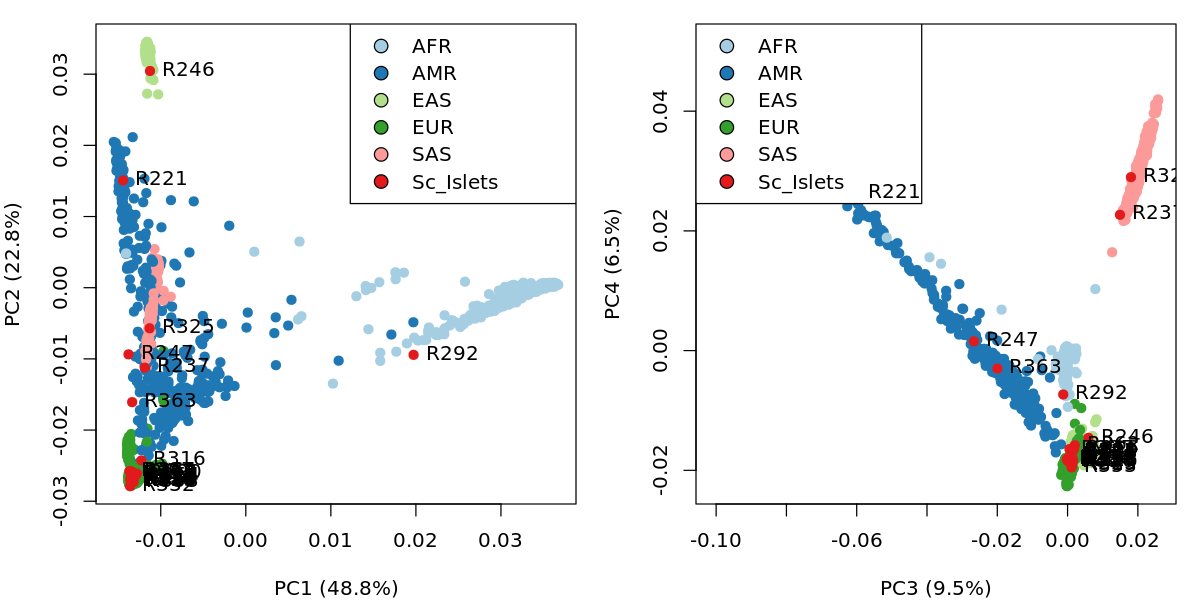

In [18]:
#Plot PCA and label our samples

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2), mar=c(4,4,1,1))
plot(PC2~PC1, pcas_new, pch=19, col =  col[as.numeric(samp2$SuperPopulation.Code[match(pcas_new$IID, samp2$Sample)])], xlab=var_new_expl[1], ylab=var_new_expl[2])
legend("topright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col, pt.cex=1.5, y.intersp = 1.6 )
text(pcas_new$PC1, pcas_new$PC2, labels = pcas_new$labs, pos = 4)

plot(PC4~PC3, pcas_new, pch=19, col =  col[as.numeric(samp2$SuperPopulation.Code[match(pcas_new$IID, samp2$Sample)])], xlab=var_new_expl[3], ylab=var_new_expl[4])
legend("topleft", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col , pt.cex=1.5, y.intersp = 1.6)
text(pcas_new$PC3, pcas_new$PC4, labels = pcas_new$labs, pos=4)


In [71]:
pdf("/path/to/genotypes/pca/PCA_plot_new.pdf")
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(PC2~PC1, pcas_new, pch=16, cex=0.8,
     col =  col[as.numeric(samp2$SuperPopulation.Code[match(pcas_new$IID, samp2$Sample)])], xlab=var_new_expl[1], ylab=var_new_expl[2])
legend("topright", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col, pt.cex=1.2, y.intersp = 1 )
text(pcas_new$PC1, pcas_new$PC2, labels = pcas_new$labs, pos = 4, cex=0.8)

plot(PC4~PC3, pcas_new, pch=16, cex=0.8,
     col =  col[as.numeric(samp2$SuperPopulation.Code[match(pcas_new$IID, samp2$Sample)])], xlab=var_new_expl[3], ylab=var_new_expl[4])
legend("topleft", legend = levels(samp2$SuperPopulation.Code), pch = 21, pt.bg = col , pt.cex=1.2, y.intersp = 1)
text(pcas_new$PC3, pcas_new$PC4, labels = pcas_new$labs, pos=4, cex=0.8)
dev.off()

png 
  2

In [1]:
pcas = read.table('/path/to/genotypes/pca/islets_28ALL.pca.eigenvec', header=T)
pcas

FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,⋯,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R207,R207,-0.0357571,-0.0433500,-0.009530110,0.00946539,0.00248291,-0.00235139,0.02224520,0.1034740,⋯,0.057826100,0.066491100,-0.049838100,0.137174000,0.02680910,0.01248500,0.023710400,-0.034772500,0.041688400,0.294989000
R217,R217,-0.0382804,-0.0643090,-0.007989110,0.03306490,-0.00510151,0.01702640,-0.00219146,0.1171330,⋯,0.087142400,0.082794100,0.061770600,-0.202493000,0.09943920,0.20880200,0.059114300,-0.300833000,-0.596248000,-0.084477000
R218,R218,-0.0385329,-0.0571864,-0.021397400,0.01169350,-0.00826495,-0.00248485,-0.00280641,0.1270570,⋯,0.137751000,-0.118765000,-0.192245000,-0.100145000,-0.02804390,-0.17335200,0.080484900,0.229214000,0.300599000,0.180941000
R221,R221,-0.0291582,0.7818010,0.044663100,-0.09428920,0.18034400,-0.21915200,0.02774150,-0.1514330,⋯,-0.107646000,0.040530200,-0.044203200,-0.058761800,-0.16907800,-0.07025310,-0.069311900,-0.054751400,-0.024171800,-0.003081640
R223,R223,-0.0353169,-0.0659599,-0.004586180,0.03307650,-0.00368873,0.00243154,0.00687905,0.1227680,⋯,-0.138477000,-0.032412100,-0.160506000,0.154538000,-0.00357877,-0.21164300,0.129297000,0.329710000,-0.481842000,-0.435669000
R226,R226,-0.0360131,-0.0595114,-0.019595700,0.01062260,-0.00253171,-0.00895363,0.02225040,0.1176190,⋯,0.090967700,0.129752000,0.309214000,-0.591722000,0.15752700,0.05978180,0.089435500,-0.205171000,0.264725000,-0.123652000
R228,R228,-0.0367356,-0.0643387,-0.000307157,0.00558472,-0.01139990,0.00982287,0.00794813,0.1076840,⋯,0.063746000,0.022222100,-0.042921000,0.084781500,-0.00859556,-0.49671200,0.255043000,-0.173729000,0.175867000,-0.362923000
R234,R234,-0.0387477,-0.0640045,-0.009108130,0.02384790,0.00123802,0.01400490,0.01164970,0.1247200,⋯,-0.041251800,-0.498693000,-0.196756000,-0.033091000,0.19317500,0.14282600,-0.665277000,0.000204796,0.152919000,-0.271769000
R237,R237,-0.0259373,0.0641799,-0.004505880,0.01010730,0.02416530,-0.01471670,0.02609240,0.0945301,⋯,0.073577300,-0.018189800,-0.052659400,-0.067760500,-0.09667190,-0.00621796,-0.052778600,-0.048755000,-0.023594100,-0.036206200
